DateTime    0
Junction    0
ID          0
dtype: int64
Day with Highest Traffic: -1.0000855481499262
Junction with Highest Traffic: 1.3416407864998738


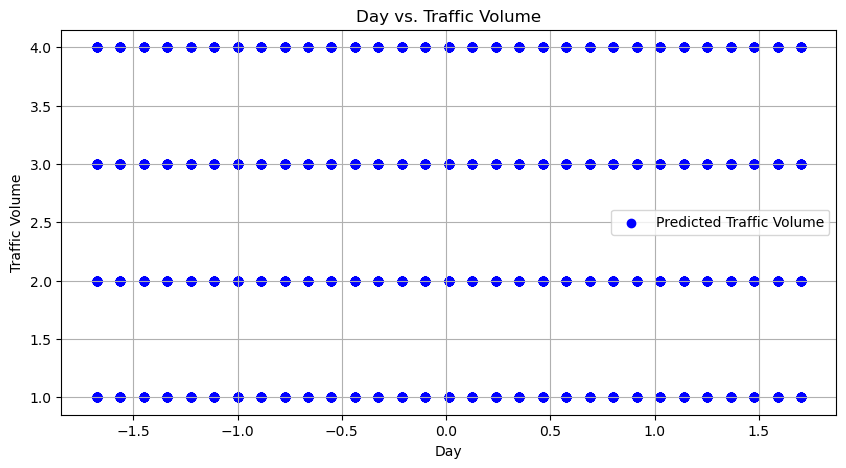

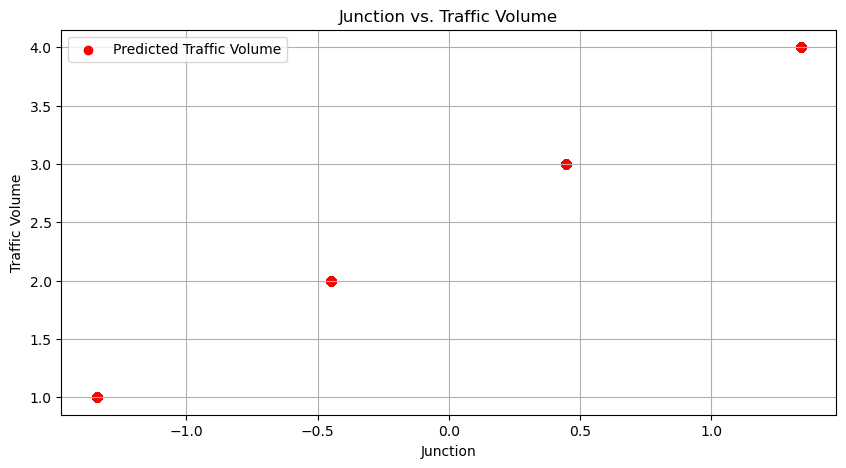

In [5]:
import pandas as pd
import numpy as np
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt


data_url = "datasets_8494_11879_test_BdBKkAj.csv"
df = pd.read_csv(data_url, encoding='ISO-8859-1')

print(df.isnull().sum())


df['DateTime'] = pd.to_datetime(df['DateTime'])







df['DayOfWeek'] = df['DateTime'].dt.dayofweek
df['Month'] = df['DateTime'].dt.month
df['Year'] = df['DateTime'].dt.year


holidays = ['2023-01-01', '2023-07-04']  


df['IsHoliday'] = df['DateTime'].isin(pd.to_datetime(holidays))











df['Year'] = df['DateTime'].dt.year
df['Month'] = df['DateTime'].dt.month
df['Day'] = df['DateTime'].dt.day


df = df.drop('DateTime', axis=1)

categorical_cols = [ 'Year', 'Month', 'Day']


target = 'Junction'

features = ['Year', 'Junction', 'Day', 'Month', 'IsHoliday', 'ID']

X = df[features]
y = df[target]

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

knn_classifier = KNeighborsClassifier(n_neighbors=5)


knn_classifier.fit(X_train, y_train)

y_pred = knn_classifier.predict(X_test)


max_traffic_index = np.argmax(y_pred) 
day_with_highest_traffic = X_test[max_traffic_index][2]  
junction_with_highest_traffic = X_test[max_traffic_index][1]  

print(f"Day with Highest Traffic: {day_with_highest_traffic}")
print(f"Junction with Highest Traffic: {junction_with_highest_traffic}")




plt.figure(figsize=(10, 5))
plt.scatter(X_test[:, 2], y_pred, color='blue', label='Predicted Traffic Volume')
plt.xlabel('Day')
plt.ylabel('Traffic Volume')
plt.title('Day vs. Traffic Volume')
plt.legend()
plt.grid(True)
plt.show()


plt.figure(figsize=(10, 5))
plt.scatter(X_test[:, 1], y_pred, color='red', label='Predicted Traffic Volume')
plt.xlabel('Junction')
plt.ylabel('Traffic Volume')
plt.title('Junction vs. Traffic Volume')
plt.legend()
plt.grid(True)
plt.show()


In [6]:
import pandas as pd
import matplotlib.pyplot as plt
data_url = "datasets_8494_11879_test_BdBKkAj.csv"
df = pd.read_csv(data_url, encoding='ISO-8859-1')


In [7]:
print(df.isnull().sum())
df['DateTime'] = pd.to_datetime(df['DateTime'])
df['DayOfWeek'] = df['DateTime'].dt.dayofweek
df['Month'] = df['DateTime'].dt.month
df['Year'] = df['DateTime'].dt.year



DateTime    0
Junction    0
ID          0
dtype: int64


In [8]:
holidays = ['2023-01-01', '2023-07-04']  
df['IsHoliday'] = df['DateTime'].isin(pd.to_datetime(holidays))
colors = ['b', 'g', 'r', 'c']
df['Year'] = df['DateTime'].dt.year
df['Month'] = df['DateTime'].dt.month
df['Day'] = df['DateTime'].dt.day

df = df.drop('DateTime', axis=1)


categorical_cols = [ 'Year', 'Month', 'Day']


In [9]:

target = 'DayOfWeek'

features = ['Year', 'Junction', 'Day', 'Month', 'IsHoliday', 'ID']
junctions_to_analyze = [1, 2, 3, 4]
filtered_df = df[df['Junction'].isin(junctions_to_analyze)]
grouped = filtered_df.groupby(['Junction', 'Day', 'IsHoliday'])[target].mean().reset_index()
plt.figure(figsize=(12, 8))

<Figure size 1200x800 with 0 Axes>

<Figure size 1200x800 with 0 Axes>

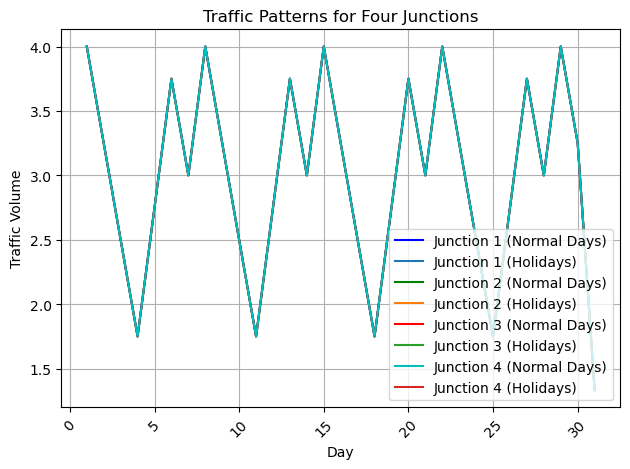

In [12]:

for i,junction_num in enumerate( junctions_to_analyze):
    junction_data = grouped[grouped['Junction'] == junction_num]
    
   
    normal_days = junction_data[junction_data['IsHoliday'] == 0]
    holidays = junction_data[junction_data['IsHoliday'] == 1]

    plt.plot(normal_days['Day'], normal_days[target], label=f'Junction {junction_num} (Normal Days)', color=colors[i])
    plt.plot(holidays['Day'], holidays[target], label=f'Junction {junction_num} (Holidays)')
    
plt.title('Traffic Patterns for Four Junctions')
plt.xlabel('Day')
plt.ylabel('Traffic Volume')
plt.xticks(rotation=45)
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()

